# Study Notebook

In [1]:
import os, json
import collections
from datetime import datetime
from IPython.display import display
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from iMahir import Study

In [2]:
home_dir = os.path.expanduser('~/')
hebrew = os.path.join(home_dir, 'Documents/vocabulary/hebrew.json')

In [3]:
heb = Study(hebrew)

preparing TF...
This is Text-Fabric 7.8.5
Api reference : https://annotation.github.io/text-fabric/Api/Fabric/

114 features found and 0 ignored
  0.00s loading features ...
   |     0.00s No structure info in otext, the structure part of the T-API cannot be used
  4.34s All features loaded/computed - for details use loadLog()


hebrew ready for study.
this is session 8:
score 4: 6 terms
score 3: 191 terms
score 2: 9 terms
score 1: 16 terms
score 0: 50 terms
total: 272


In [4]:
heb.learn()

The following scores were changed 
3->4 		 1
2<-3 		 1
1->2 		 7
2->3 		 9
0->1 		 7
0->3 		 3

duration:  0:25:31.680610

duration per term: 5.63


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Notes

## Study Stats

### Size of Known Term Set (Scores 3-4)

In [5]:
cutoff = -30

scores = [sd for sd in heb.set_data['stats'] if 'score_counts' in sd][cutoff:]
plt_scores = [s['score_counts']['3']+s['score_counts']['4'] for s in scores]
times = [datetime.strptime(sd['date'], '%Y-%m-%d %H:%M:%S.%f') for sd in scores]
time_labels = [datetime.strftime(time, format='%d-%m') for time in times]

# calculate cycle lines
cycle_bounds = []
last_cycle = None
for i, sd in enumerate(scores):
    cycle = sd['cycle']
    last_cycle = cycle if not last_cycle else last_cycle
    if last_cycle != cycle:
        cycle_bounds.append(i)
        last_cycle = cycle

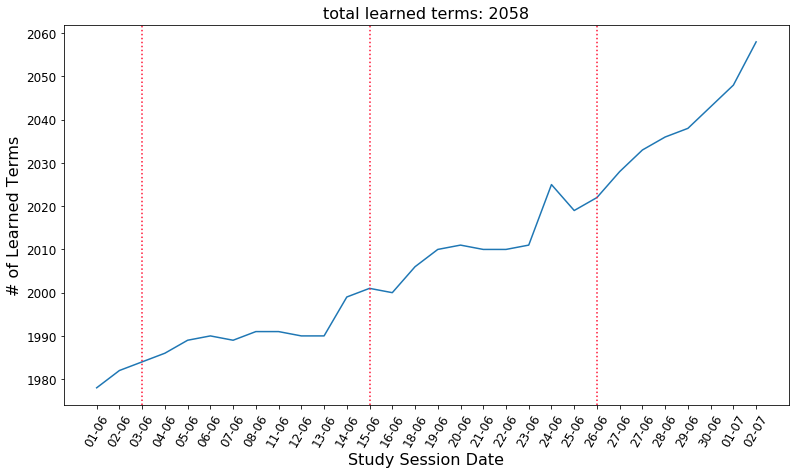

In [6]:
x = np.arange(len(time_labels[cutoff:]))
plt.figure(figsize=(13, 7))
plt.plot(x, plt_scores)
plt.xticks(x, time_labels, rotation=60, size=12)
plt.yticks(size=12)
plt.ylabel('# of Learned Terms', size=16)
plt.xlabel('Study Session Date', size=16)
plt.title(f'total learned terms: {plt_scores[-1]}', size=16)
for bound in cycle_bounds:
    plt.axvline(bound, color='#FF1234', linestyle='dotted')
plt.show()

### Kinds of Score 0's Left

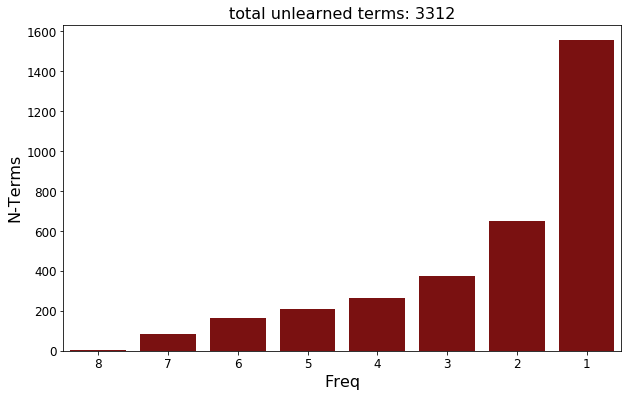

,0
8,4
7,84
6,165
5,210
4,266
3,376
2,652
1,1555


In [7]:
zeros = collections.Counter()

for i in heb.set_data['term_queues']['0']:
    
    term_lexs = heb.set_data['terms_dict'][i]['source_lexemes']
     
    for term in term_lexs:
        freq = heb.F.freq_lex.v(term)
        zeros[freq] += 1
            
zeros = pd.DataFrame.from_dict(zeros, orient='index').sort_values(by=0)
nbars = np.arange(zeros.shape[0])
plt.figure(figsize=(10, 6))
sns.barplot(nbars, zeros[0], color='darkred')
plt.xticks(nbars, labels=list(str(i) for i in zeros.index), size=12)
plt.yticks(size=12)
plt.ylabel('N-Terms', size=16)
plt.xlabel('Freq', size=16)
plt.title(f'total unlearned terms: {zeros[0].sum()}', size=16)
plt.show()
display(zeros)

In [14]:
# for term in heb.set_data['term_queues']['0']:
    
#     term_dat = heb.set_data['terms_dict'][term]
#     sources = term_dat['source_lexemes']
    
#     freqs = [heb.F.freq_lex.v(s) for s in sources]
    
#     if 9 in freqs:
#         print(term)
#         print(term_dat, freqs)